In [2]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import plotly.express as px
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "/Users/daniel421/Desktop/STAT_724/ds_724/Final_Project"
# CHAPTER_ID = "dim_reduction"
# IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
# os.makedirs(IMAGES_PATH, exist_ok=True)

In [4]:
import os
#UP_DIR = '/Users/daniel421/Desktop/STAT_724/ISLR_data'
csv_file = os.path.join(PROJECT_ROOT_DIR,'listings_2.csv')
abnb = pd.read_csv(csv_file, low_memory=False)
print(abnb.head())

     id last_scraped                                               name  \
0  2595      11/3/21                              Skylit Midtown Castle   
1  3831      11/3/21  Whole flr w/private bdrm, bath & kitchen(pls r...   
2  5121      11/3/21                                    BlissArtsSpace!   
3  5136      11/3/21           Spacious Brooklyn Duplex, Patio + Garden   
4  5178      11/3/21                   Large Furnished Room Near B'way　   

   host_id host_since                      host_location  host_response_time  \
0     2845     9/9/08  New York, New York, United States  a few days or more   
1     4869    12/7/08  New York, New York, United States  a few days or more   
2     7356     2/3/09  New York, New York, United States  within a few hours   
3     7378     2/3/09  Brooklyn, New York, United States        within a day   
4     8967     3/3/09  New York, New York, United States  within a few hours   

  host_response_rate host_acceptance_rate host_is_superhost  ...  \


In [5]:
# abnb['host_is_superhost2'] = (abnb['host_is_superhost'] == 't').astype('int')

In [6]:
abnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37713 entries, 0 to 37712
Data columns (total 61 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            37713 non-null  int64  
 1   last_scraped                                  37713 non-null  object 
 2   name                                          37700 non-null  object 
 3   host_id                                       37713 non-null  int64  
 4   host_since                                    37682 non-null  object 
 5   host_location                                 37579 non-null  object 
 6   host_response_time                            20655 non-null  object 
 7   host_response_rate                            20655 non-null  object 
 8   host_acceptance_rate                          21359 non-null  object 
 9   host_is_superhost                             37682 non-null 

## EDA and Visualizations

In [7]:
import plotly.express as px

### Roomtypes in Qns

In [12]:
abnb_queens_df = abnb[abnb.neighbourhood_group_cleansed == 'Queens']

room_graph=px.histogram(abnb_queens_df, x="neighbourhood_cleansed",color = "room_type", title="Room types in Queens", template="plotly_white",
labels = {"count": "Count", "neighbourhood_cleansed": "Neighborhoods"})
room_graph.show()

In [8]:
px.histogram?

Signature:
px.histogram(
    data_frame=None,
    x=None,
    y=None,
    color=None,
    pattern_shape=None,
    facet_row=None,
    facet_col=None,
    facet_col_wrap=0,
    facet_row_spacing=None,
    facet_col_spacing=None,
    hover_name=None,
    hover_data=None,
    animation_frame=None,
    animation_group=None,
    category_orders=None,
    labels=None,
    color_discrete_sequence=None,
    color_discrete_map=None,
    pattern_shape_sequence=None,
    pattern_shape_map=None,
    marginal=None,
    opacity=None,
    orientation=None,
    barmode='relative',
    barnorm=None,
    histnorm=None,
    log_x=False,
    log_y=False,
    range_x=None,
    range_y=None,
    histfunc=None,
    cumulative=None,
    nbins=None,
    title=None,
    template=None,
    width=None,
    height=None,
)
Docstring:
    In a histogram, rows of `data_frame` are grouped together into a
    rectangular mark to visualize the 1D distribution of an aggregate
    function `histfunc` (e.g. the count or su

### Roomtypes in BK

In [13]:
abnb_brooklyn_df = abnb[abnb.neighbourhood_group_cleansed == 'Brooklyn']

room_graph=px.histogram(abnb_brooklyn_df, x="neighbourhood_cleansed",color = "room_type",title="Room types in Brooklyn", labels = {"count": "Count", "neighbourhood_cleansed": "Neighborhoods"}, template="plotly_white")
room_graph.show()

### Roomtypes in Manhattan

In [14]:
abnb_manhattan_df = abnb[abnb.neighbourhood_group_cleansed == 'Manhattan']

room_graph=px.histogram(abnb_manhattan_df, x="neighbourhood_cleansed", color = "room_type",title="Room types in Manhattan", labels = {"count": "Count", "neighbourhood_cleansed": "Neighborhoods"}, template="plotly_white")
room_graph.show()

In [50]:
# room_graph=px.histogram(abnb, x="neighbourhood_cleansed", facet_row = "room_type",title="Room types in NYC", template="plotly_white")
# room_graph.show()

In [51]:
abnb_east_elmhurst = abnb_queens_df[abnb_queens_df.neighbourhood_cleansed == "East Elmhurst"]
abnb_east_elmhurst_affordable = abnb_east_elmhurst[abnb_east_elmhurst.price < '70']
abnb_east_elmhurst_affordable.head()

,id,last_scraped,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
872,689329,11/3/21,Cozy 15 mins Manhattan& 10 Mins LGA,2446219,5/23/12,"New York, New York, United States",NaN,NaN,NaN,t,...,4.94,4.74,4.84,NaN,f,2,0,2,0,3.02
1224,973535,11/3/21,"Garden Apt, 5 mins from LaGuardia",3179866,8/6/12,"New York, New York, United States",within an hour,100%,98%,f,...,4.83,4.52,4.51,NaN,f,7,7,0,0,1.67
3019,3836199,11/3/21,"2 bedroom with yard, 4 mins to LGA",19758179,8/10/14,"New York, New York, United States",within an hour,80%,100%,f,...,4.65,4.31,4.46,NaN,f,1,1,0,0,1.48
3083,3930274,11/4/21,"1 BR🌿friendly close to LGA nd the 🌃, no extra ...",6689650,6/1/13,US,within a few hours,100%,50%,f,...,5.00,5.00,5.00,NaN,f,3,1,2,0,3.00
3579,4593770,11/3/21,Sunny & spacious 1 bedroom gem!,23812318,11/16/14,"Queens, New York, United States",NaN,NaN,NaN,f,...,5.00,4.77,4.91,NaN,f,1,1,0,0,0.51


In [52]:
# room_graph = px.histogram(abnb_east_elmhurst_affordable, x="room_type", title="Number of affordable room types",
#                        template="plotly_white")
# room_graph.show()

In [53]:
abnb_LIC = abnb_queens_df[abnb_queens_df.neighbourhood_cleansed == "Long Island City"]
abnb_LIC_affordable = abnb_LIC[abnb_LIC.price < '70']
abnb_LIC_affordable.head()

,id,last_scraped,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
23,12937,11/3/21,"1 Stop fr. Manhattan! Private Suite,Landmark B...",50124,10/31/09,"New York, New York, United States",within an hour,100%,94%,t,...,4.90,4.88,4.84,NaN,f,1,0,1,0,3.15
198,87566,11/3/21,1 BR apt near Midtown Manhattan,479521,4/2/11,"Holland, Pennsylvania, United States",within an hour,100%,38%,t,...,5.00,4.82,4.73,NaN,f,1,1,0,0,0.12
357,234870,11/3/21,Private Room With GREAT Location,1229984,9/30/11,"New York, New York, United States",within a day,70%,30%,f,...,4.94,4.90,4.74,NaN,f,2,0,2,0,0.64
431,269889,11/3/21,One stop from Midtown Manhattan!,1413098,11/16/11,"New York, New York, United States",within an hour,100%,100%,t,...,4.99,4.85,4.86,NaN,f,1,0,1,0,2.76
575,405025,11/3/21,LUXE Apt & Garden (Sanitized),2018042,3/27/12,"New York, New York, United States",within an hour,100%,100%,f,...,4.94,4.83,4.82,NaN,f,1,1,0,0,1.14


### Affordable room types

#### LIC

In [54]:
room_graph = px.histogram(abnb_LIC_affordable, x="room_type", title="Number of affordable room types",
                       template="plotly_white")
room_graph.show()

In [55]:
# room_graph = px.histogram(abnb_LIC, x="price", title="Affordable room prices",
#                        template="plotly_white", categoryorder = )

#### LIC part 2

In [56]:
room_graph = px.histogram(abnb_LIC, x="price", title="Affordable room prices",
                       template="plotly_white").update_xaxes(categoryorder = "total descending")
room_graph.show()

#### Manhattan

In [57]:
room_graph = px.histogram(abnb_manhattan_df, x="price", title="Affordable room prices",
                       template="plotly_white").update_xaxes(categoryorder = "total descending")
room_graph.show()

#### Qns

In [58]:
room_graph = px.histogram(abnb_queens_df, x="price", title="Affordable room prices",
                       template="plotly_white").update_xaxes(categoryorder = "total descending")
room_graph.show()

### Instant Bookable

#### Qns

In [59]:
room_graph = px.histogram(abnb_queens_df, x="price", facet_col = "instant_bookable",title="Affordable room prices",
                        template="plotly_white").update_xaxes(categoryorder = "total descending")
room_graph.show()

In [60]:
room_graph = px.histogram(abnb_queens_df, x="price", facet_col = "instant_bookable",title="Affordable room prices",
                        template="plotly_white")
room_graph.show()

In [62]:
# fig = px.bar(abnb_queens_df, x="price", facet_row= "instant_bookable",title="Affordable room prices",
#                         template="plotly_white")
# fig.show()

In [63]:
room_graph = px.histogram(abnb_queens_df, x="price", facet_col = "instant_bookable",title="Affordable room prices",
                        template="plotly_white")
room_graph.show()

#### BK

In [61]:
room_graph = px.histogram(abnb_brooklyn_df, x="price", facet_col = "instant_bookable",title="Affordable room prices",
                        template="plotly_white")
room_graph.show()

### Visualizing Geographical Data

In [17]:
%store abnb_queens_df

Stored 'abnb_queens_df' (DataFrame)


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

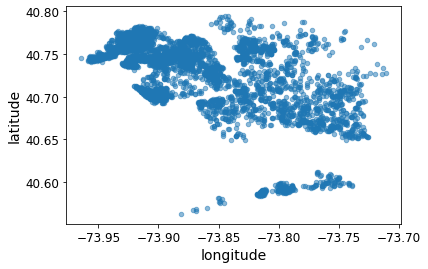

In [11]:
abnb_queens_df.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.51)

In [13]:
?plot

Object `plot` not found.


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not ['$145.00 ' '$75.00 ' '$78.00 ' ... '$100.00 ' '$100.00 ' '$33.00 ']

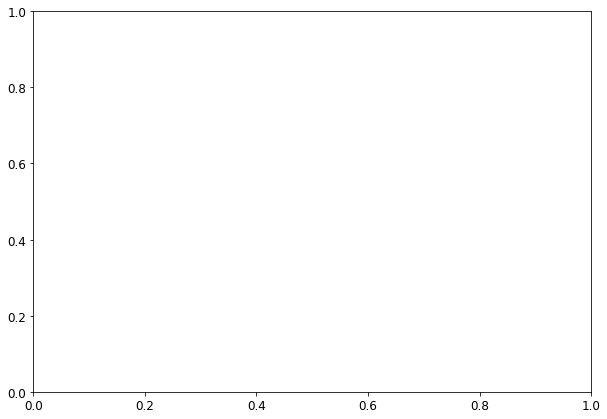

Signature:      abnb_queens_df.plot(*args, **kwargs)
Type:           PlotAccessor
String form:    <pandas.plotting._core.PlotAccessor object at 0x7fdfa01419d0>
File:           /opt/anaconda3/envs/sfds/lib/python3.9/site-packages/pandas/plotting/_core.py
Docstring:     
Make plots of Series or DataFrame.

Uses the backend specified by the
option ``plotting.backend``. By default, matplotlib is used.

Parameters
----------
data : Series or DataFrame
    The object for which the method is called.
x : label or position, default None
    Only used if data is a DataFrame.
y : label, position or list of label, positions, default None
    Allows plotting of one column versus another. Only used if data is a
    DataFrame.
kind : str
    The kind of plot to produce:

    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - '

In [16]:
# abnb_queens_df.plot?
abnb_queens_df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             label="instant_bookable", figsize=(10,7),
             c="price", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

## Run these cell(s) below after all visualizations are complete

In [28]:
# Run this cell after all visualizations are complete
abnb['host_is_superhost2'] = (abnb['host_is_superhost'] == 't').astype('int')
abnb['host_identity_verified2'] = (abnb['host_identity_verified'] == 't').astype('int')
abnb['has_availability2'] = (abnb['has_availability'] == 't').astype('int')
abnb['instant_bookable2'] = (abnb['instant_bookable'] == 't').astype('int')
abnb = pd.get_dummies(abnb, columns = ['room_type'], prefix = "dmy", prefix_sep = "_", drop_first = True)
#abnb['room_type2'] = (abnb['room_type'] == 'Entire home/apt').astype('int')

In [29]:
abnb['Borough'] = abnb['neighbourhood_group_cleansed']
abnb.drop(columns = ['id', 'host_id', 'name','host_since', 'host_location', 'host_response_time', 'host_is_superhost', 'host_has_profile_pic','host_neighbourhood','neighbourhood', 'neighbourhood_group_cleansed', 'property_type','bathrooms', 'bathrooms_text', 'calendar_last_scraped','last_scraped', 'first_review', 'last_review', 'license', 'host_identity_verified', 'has_availability', 'instant_bookable'], inplace= True)
abnb.dropna(axis=0, subset=['reviews_per_month'], inplace= True)
abnb.dropna(axis=0, subset=['host_response_rate'], inplace=True)

#### The response rates are objects, lets convert them to floats

In [30]:
abnb['host_response_rate'] = (abnb['host_response_rate'].str.strip('%').astype(float))
abnb['host_response_rate'] = abnb['host_response_rate']/100
abnb['host_acceptance_rate'] = (abnb['host_acceptance_rate'].str.strip('%').astype(float))
abnb['host_acceptance_rate'] = abnb['host_acceptance_rate']/100

#### The price are objects, lets convert them to integers

I am not able to convert them to regular integers

In [26]:
# abnb['price'] = (abnb['price'].str.strip('$').astype(int))
# abnb[abnb.columns[10]] = abnb[abnb.columns[10]].apply(lambda x: x.str.replace('$')).apply(lambda x: x.str.replace(',','')).astype(np.int64)
# abnb['price'] = abnb['price'].replace({'$':''}, regex = True)
# abnb['price'] = abnb['price'].astype(str)
# abnb['price'] = abnb['price'].replace('$', '')
# abnb['price'] = abnb['price'].astype(float)
# abnb['price'] = abnb['price'].astype(int)

# type(abnb['price'])
# abnb['price'] = abnb['price'].replace(['$'], [''], inplace = True)
# print(abnb.dtypes)
# abnb['price']
# abnb['prices'] = map(lambda x: x.replace("$",""), abnb['price'])
# abnb['prices'].astype(float)
# abnb['price'] = abnb['price'].astype(float)
# abnb['price'] = abnb['price'].astype(int)

0        None
1        None
2        None
3        None
4        None
         ... 
37708    None
37709    None
37710    None
37711    None
37712    None
Name: price, Length: 37713, dtype: object

In [1]:
abnb.fillna(axis = 0, method = "ffill")

NameError: name 'abnb' is not defined

In [52]:
# abnb['instant_bookable'].head()

0    f
1    f
2    f
3    f
4    f
Name: instant_bookable, dtype: object

In [32]:
abnb.to_csv('listings_6.csv', index = False)

In [33]:
abnb.head()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,accommodates,bedrooms,beds,...,calculated_host_listings_count_shared_rooms,reviews_per_month,host_is_superhost2,host_identity_verified2,has_availability2,instant_bookable2,dmy_Hotel room,dmy_Private room,dmy_Shared room,Borough
0,0.35,0.18,8.0,8.0,Midtown,40.75356,-73.98559,1,NaN,1.0,...,0,0.33,0,1,1,0,0,0,0,Manhattan
1,0.21,0.76,1.0,1.0,Bedford-Stuyvesant,40.68494,-73.95765,3,1.0,3.0,...,0,4.91,0,1,1,0,0,0,0,Brooklyn
2,1.00,1.00,1.0,1.0,Bedford-Stuyvesant,40.68535,-73.95512,2,1.0,1.0,...,0,0.53,0,1,1,0,0,1,0,Brooklyn
3,1.00,0.25,1.0,1.0,Sunset Park,40.66265,-73.99454,4,2.0,2.0,...,0,0.02,0,1,1,0,0,0,0,Brooklyn
4,1.00,1.00,1.0,1.0,Midtown,40.76457,-73.98317,2,1.0,1.0,...,0,3.70,0,0,1,0,0,1,0,Manhattan
